## Analiza komunikacji miejskiej we Wrocławiu


**Tworzenie sieci**

In [13]:
import pandas as pd
import xml.etree.ElementTree as ET
import networkx as nx

In [18]:
def create_graph_from(lines):
    data = pd.DataFrame( columns=['source', 'target', 'delta_time', 'line_name' ])
    for index, line in enumerate(lines):
        tree = ET.parse(f'data/XML-rozkladyjazdy/{line}/{line}.xml')
        root = tree.getroot()
        czasy_list = []
        if line.isdigit():
            line_name = str(int(line))
        else:
            line_name = line
        linia = root.find('linia')
        wariant = linia.find('wariant')
        przystanek = wariant.find('przystanek')
        czasy = przystanek.find('czasy')
        for przystanek_czas in czasy.findall('przystanek'):
            czasy_list.append({
                                'nazwa': przystanek_czas.get('nazwa'),
                                 'czas': przystanek_czas.get('czas')})
        df = pd.DataFrame(czasy_list)
        df['czas'] = df['czas'].fillna(0).astype(int)
        df['source'] = df['nazwa'].shift(1)
        df['target'] = df['nazwa']
        df['delta_time'] = df['czas'] - df['czas'].shift(1)
        df.dropna(inplace=True)
        df = df.drop(['nazwa','czas'], axis=1)
        df['line_name'] = line_name
        data = pd.concat([data, df], axis=0)
    return data

In [37]:
import os
line_names = []
for path, subdirs, files in os.walk("data"):
    for name in files:
        line_names.append(name[:4])

print(line_names)

df = create_graph_from(line_names)
print(df.columns)

['0148', '0345', '0146', '0112', '0911', '0115', '0123', '0920', '0124', '0927', '0147', '0140', '0716', '0149', '0125', '0122', '0921', '0114', '0319', '0917', '0113', '000d', '0253', '000c', '0003', '0004', '0032', '000k', '0607', '0255', '0206', '0033', '0005', '0002', '0020', '0011', '0016', '0248', '0241', '0246', '0074', '0017', '0010', '0247', '0240', '0612', '0249', '0131', '0109', '0136', '0903', '0100', '0138', '0904', '0107', '0106', '0101', '0934', '0108', '0137', '0933', '0130', '0958', '0967', '0116', '0129', '0111', '0315', '0127', '0924', '0118', '0120', '0923', '0948', '0145', '0941', '0142', '0714', '0121', '0126', '0119', '0110', '0913', '0117', '0128', '0914', '0940', '0143', '0947', '0144', '0007', '0009', '0031', '0257', '0250', '000n', '0259', '0602', '0008', '0001', '0003', '0004', '0032', '0033', '0005', '0002', '0020', '0011', '0016', '0074', '0017', '0010', '0007', '0009', '0031', '0008', '0001', '0006', '0070', '0023', '0015', '0006', '0251', '000a', '0245',

In [38]:
mpk_graph = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=['delta_time', 'line_name'], create_using=nx.MultiDiGraph())

mpk_graph.edges()

# for i in range(len(df)-1):
#     G.add_edge(df['nazwa'][i], df['nazwa'][i+1])
# print(G)
# wyświetl informacje o grafie
#print(nx.info(G))

OutMultiEdgeDataView([('Dworzec Główny (Dworcowa)', 'Wzgórze Partyzantów'), ('Dworzec Główny (Dworcowa)', 'Wzgórze Partyzantów'), ('Dworzec Główny (Dworcowa)', 'skwer Krasińskiego'), ('Dworzec Główny (Dworcowa)', 'skwer Krasińskiego'), ('Dworzec Główny (Dworcowa)', 'Kościuszki'), ('Dworzec Główny (Dworcowa)', 'Kościuszki'), ('Wzgórze Partyzantów', 'Renoma'), ('Wzgórze Partyzantów', 'Renoma'), ('Wzgórze Partyzantów', 'Renoma'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze Partyzantów', 'DWORZEC GŁÓWNY'), ('Wzgórze 

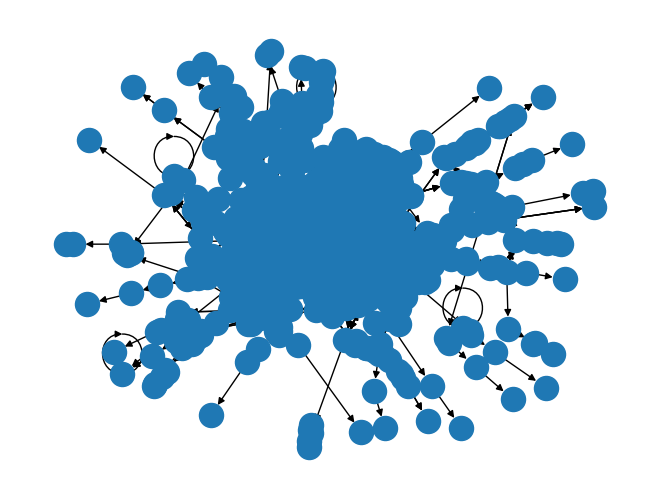

In [40]:
nx.draw(mpk_graph) # no troche do dupy to wygląda póki co ale chyba działa